# Enoncé

Vous avez participé à une compétition sur Kaggle sur le jeu de données de Titanic (celle-ci existe, les curieux peuvent la retrouver sur Kaggle !). Vous avez pour cela à votre disposition [une liste de 891 passagers](https://www.kaggle.com/c/titanic), contenant les caractéristiques suivantes :


- PassengerID : Identifiant du passager
- Survived : Indicateur de survi d'un passager (1 si le passager a survecu, 0 s’il est décédé)
- Pclass: Classe du passager (1 = 1ère classe, 2 = 2ème classe, 3 = 3ème classe)
- Name : Nom et titre du passager
- Sex : Sexe du passager
- Age : Age du passager (Décimal si inférieur à 1, estimé si de la forme xx.5)
- SibSp : Nombre d’époux, de frères et de soeurs présents à bord
- Parch : Nombre de parents ou d’enfants présents à bord 
- Ticket : Numéro du ticket 
- Fare : Tarif des tickets (Le prix est indiqué en £ et pour un seul achat (peut correspondre à plusieurs tickets)
- Cabin : Numéro de Cabine
- Embarked : Port d’embarcation (C = Cherbourg, Q = Queenstown, S = Southampton)
	 	

# Exercice

La compétition a été l’occasion de revenir sur ce jeu de données très célèbre, et plusieurs tâches étaient attendues, :
- identifier les facteurs favorisants la survie d'un passager par rapport à un autre, en dressant une typologie des survivants
- créer un algorithme qui pourrait prédire la survie d'un individu à partir de ces caractéristiques.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import statsmodels.formula.api as smf
import itertools
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime
from os import getcwd
from function import *
from mpl_toolkits.mplot3d import Axes3D
from joblib import dump, load

## 1. Charger vos données dans un DataFrame Pandas

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
verboseMain = False

print("Chargement des données...")
# Récupère le répertoire du programme
file_path = getcwd() + "\\"

Chargement des données...


In [3]:
file_name = 'titanic_dataset_kaggle_test.csv'
# file_name = 'titanic_dataset_kaggle_train.csv'

file_separator = ','

df_origin = pd.read_csv(file_path+file_name, sep=file_separator, index_col="PassengerId")

print("Chargement des données", df_origin.shape, ".... ...................................... END")

Chargement des données (418, 10) .... ...................................... END


In [4]:
df_origin.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = df_origin.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

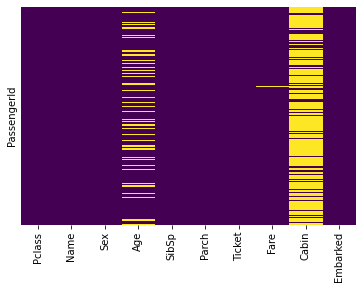

In [7]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')

In [8]:
if "train" in file_name:
    sns.set_style('whitegrid')
    sns.countplot(x='Survived', data=df)

In [9]:
# display 
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

#  2. Typage et Organisation des données

In [10]:
df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
df['Sex'] = df['Sex'].astype('category')
df['sex_cat'] = df['Sex'].cat.codes
df['sex_cat']

PassengerId
892     1
893     0
894     1
895     1
896     0
       ..
1305    1
1306    0
1307    1
1308    1
1309    1
Name: sex_cat, Length: 418, dtype: int8

In [12]:
df.dtypes

Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object
sex_cat         int8
dtype: object

## 2.1 Ajout du titre du passager

In [13]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [14]:
df_copy = df.copy()

In [15]:
ser_name_split = df_copy["Name"].dropna().str.split("(, |\. )", n=0, expand=True)
ser_name_split

,0,1,2,3,4
PassengerId,,,,,
892,Kelly,",",Mr,.,James
893,Wilkes,",",Mrs,.,James (Ellen Needs)
894,Myles,",",Mr,.,Thomas Francis
895,Wirz,",",Mr,.,Albert
896,Hirvonen,",",Mrs,.,Alexander (Helga E Lindqvist)
...,...,...,...,...,...
1305,Spector,",",Mr,.,Woolf
1306,Oliva y Ocana,",",Dona,.,Fermina
1307,Saether,",",Mr,.,Simon Sivertsen


In [16]:
ser_name_split[3].value_counts()

.     418
Name: 3, dtype: int64

In [17]:
if "train" in file_name:
    ser_name_split[5].value_counts()

In [18]:
if "train" in file_name:
    ser_name_split[6].value_counts()

In [19]:
if "train" in file_name:
    ser_name_split[ser_name_split[6]=="Barrett)"]

In [20]:
if "train" in file_name:
    ser_name_split.loc[ser_name_split[6]=="Barrett)", 4]=ser_name_split.loc[ser_name_split[6]=="Barrett)", 4] +". " + ser_name_split.loc[ser_name_split[6]=="Barrett)", 6]
    ser_name_split[ser_name_split[6]=="Barrett)"]

In [21]:
if "train" in file_name:
    ser_name_split = ser_name_split.drop(columns=[1,3,5, 6])
elif "test"  in file_name:
    ser_name_split = ser_name_split.drop(columns=[1,3])
ser_name_split

,0,2,4
PassengerId,,,
892,Kelly,Mr,James
893,Wilkes,Mrs,James (Ellen Needs)
894,Myles,Mr,Thomas Francis
895,Wirz,Mr,Albert
896,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...
1305,Spector,Mr,Woolf
1306,Oliva y Ocana,Dona,Fermina
1307,Saether,Mr,Simon Sivertsen


In [22]:
ser_name_split = ser_name_split.rename(columns={0 : "Last_name", 2:"Titre", 4:"First_name"})
ser_name_split

,Last_name,Titre,First_name
PassengerId,,,
892,Kelly,Mr,James
893,Wilkes,Mrs,James (Ellen Needs)
894,Myles,Mr,Thomas Francis
895,Wirz,Mr,Albert
896,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...
1305,Spector,Mr,Woolf
1306,Oliva y Ocana,Dona,Fermina
1307,Saether,Mr,Simon Sivertsen


In [23]:
ser_name_split["Titre"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Titre, dtype: int64

Après vérification, 
* Jonkheer = Seigneur
* Mme = Mrs
* Mlle = Miss
* Lady = Miss
* Ms = Mrs or Miss
* Sir = Mr
* Don = Mr    

Correction pour homogénéiser les données

In [24]:
ser_name_split.loc[(ser_name_split["Titre"]  == "Mlle") | (ser_name_split["Titre"]  == "Lady"), "Titre"] = "Miss"
ser_name_split.loc[ser_name_split["Titre"]  == "Mme", "Titre"] = "Mrs"
ser_name_split.loc[(ser_name_split["Titre"]  == "Sir") | (ser_name_split["Titre"]  == "Don"), "Titre"] = "Mr"
ser_name_split["Titre"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Titre, dtype: int64

In [25]:
type(ser_name_split)

pandas.core.frame.DataFrame

Fusion des DF

In [26]:
ser_name_split.head()

,Last_name,Titre,First_name
PassengerId,,,
892,Kelly,Mr,James
893,Wilkes,Mrs,James (Ellen Needs)
894,Myles,Mr,Thomas Francis
895,Wirz,Mr,Albert
896,Hirvonen,Mrs,Alexander (Helga E Lindqvist)


In [27]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [28]:
df = pd.concat([df, ser_name_split], axis=1)
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat,Last_name,Titre,First_name
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Kelly,Mr,James
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Wilkes,Mrs,James (Ellen Needs)
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Myles,Mr,Thomas Francis
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Wirz,Mr,Albert
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Hirvonen,Mrs,Alexander (Helga E Lindqvist)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Spector,Mr,Woolf
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,Oliva y Ocana,Dona,Fermina
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Saether,Mr,Simon Sivertsen


In [29]:
df['Titre'] = df['Titre'].astype('category')
df['title_cat'] = df['Titre'].cat.codes
df['title_cat']

PassengerId
892     5
893     6
894     5
895     5
896     6
       ..
1305    5
1306    1
1307    5
1308    5
1309    3
Name: title_cat, Length: 418, dtype: int8

In [30]:
df['Embarked'] = df['Embarked'].astype('category')
df['embarked_cat'] = df['Embarked'].cat.codes
df['embarked_cat']

PassengerId
892     1
893     2
894     1
895     2
896     2
       ..
1305    2
1306    0
1307    2
1308    2
1309    0
Name: embarked_cat, Length: 418, dtype: int8

# 3. Nettoyer votre Dataset avec drop(), dropna() 

CORR ------------------


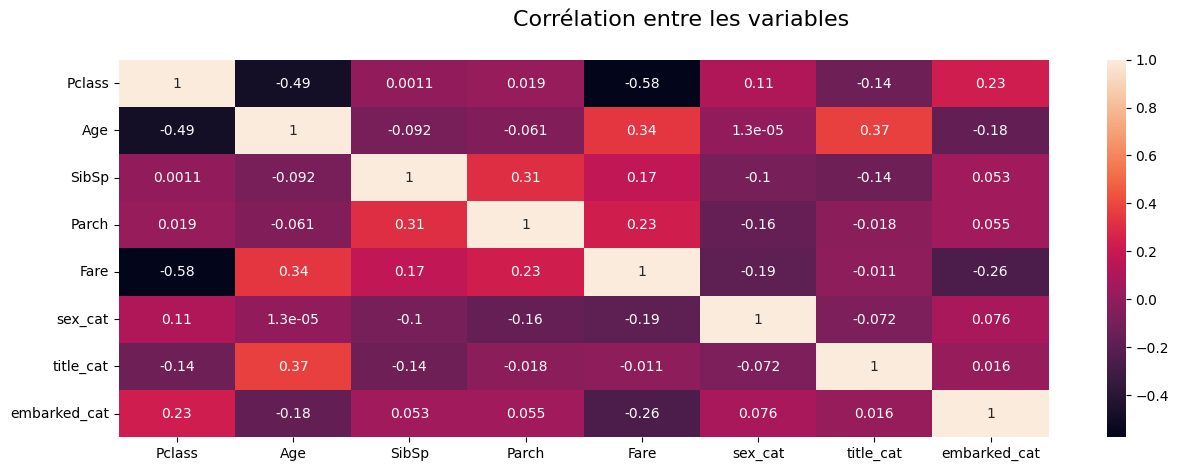

In [31]:
##on utilise data.corr et le heatmap de seborn
corr_df = df.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

## 3.1. PONT > traiter les ponts

### 3.1.1. PONT > déterminer le pont à partir de la cabine

Compléter les cabines pour les valeurs manquantes


De nombreuses valeurs manquantes parsèment le jeu de données.
Le nombre sur **Cabin** peut potentiellement facilement s'expliquer assez facilement : cela correspond pour une grande partie à des individus qui n'avaient simplement pas de cabine. En effet seuls les passagers de 1ère classe et certains de 2ème disposaient d'un numéro de cabine pour leur voyage.

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

In [32]:
df['Cabin']

PassengerId
892      NaN
893      NaN
894      NaN
895      NaN
896      NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 418, dtype: object

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

In [33]:
df['pont']= df['Cabin'].str[0]
# La cabine T est une cabine de classe supérieure située sur le pont A.
df.loc[df['pont'] == 'T','pont'] = 'A'
df['pont_fare'] = df['pont']
df['pont']

PassengerId
892     NaN
893     NaN
894     NaN
895     NaN
896     NaN
       ... 
1305    NaN
1306      C
1307    NaN
1308    NaN
1309    NaN
Name: pont, Length: 418, dtype: object

In [34]:
df.loc[df['pont'].isnull(),'Pclass'].value_counts()

3    214
2     86
1     27
Name: Pclass, dtype: int64

on retrouve une majorité de 2ème et 3ème classe sans cabine, on peut leur attribuer la valeur N qui correspondra à l'absence d'attribution
Pour les 1ères classes restantes, on utilisera la moyenne payée par leurs homologues en fonction de leur pont attribué et de leur pont d'embarcation

In [35]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat,Last_name,Titre,First_name,title_cat,embarked_cat,pont,pont_fare
PassengerId,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Kelly,Mr,James,5,1,NaN,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,Wilkes,Mrs,James (Ellen Needs),6,2,NaN,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Myles,Mr,Thomas Francis,5,1,NaN,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Wirz,Mr,Albert,5,2,NaN,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,Hirvonen,Mrs,Alexander (Helga E Lindqvist),6,2,NaN,NaN


In [36]:
df.describe(include="all")

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_cat,Last_name,Titre,First_name,title_cat,embarked_cat,pont,pont_fare
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000,418,418,418,418.000000,418.000000,91,91
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN,352,9,377,NaN,NaN,7,7
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN,Davies,Mr,Patrick,NaN,NaN,C,C
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN,4,240,7,NaN,NaN,35,35
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,0.636364,NaN,NaN,NaN,4.863636,1.401914,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,0.481622,NaN,NaN,NaN,0.880412,0.854496,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,1.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN


### 3.1.2. PONT > NAN avec Price

In [37]:
df["price"] = round(df["Fare"], 0)
df["price2"] = round(df["Fare"], 1)
df["price3"] = round(df["Fare"], 2)
df[["price", "price2", "price3"]]

,price,price2,price3
PassengerId,,,
892,8.0,7.8,7.83
893,7.0,7.0,7.00
894,10.0,9.7,9.69
895,9.0,8.7,8.66
896,12.0,12.3,12.29
...,...,...,...
1305,8.0,8.0,8.05
1306,109.0,108.9,108.90
1307,7.0,7.2,7.25


In [38]:
df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'sex_cat', 'Last_name', 'Titre', 'First_name',
       'title_cat', 'embarked_cat', 'pont', 'pont_fare', 'price', 'price2',
       'price3'],
      dtype='object')

In [45]:
colums_names = ['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat', 'Age', 'SibSp', 'Parch', 
       'Fare', 'Cabin', 'Embarked', 'embarked_cat', 'pont', 'pont_fare', 'price',
       'price2', 'price3', 'Last_name','First_name']

print("test" in file_name)

if "test" in file_name:
       colums_names.remove('Survived')
print(colums_names)
df_global = process_pont(df[colums_names], "price", "pont")

True
['Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat', 'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name', 'First_name']


KeyError: 'Survived'

In [ ]:
df_global

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,embarked_cat,pont,pont_fare,price,price2,price3,Last_name,First_name,pont_price,pont_price_ctr
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,2,NaN,NaN,7.0,7.2,7.25,Braund,Owen Harris,X,X
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,2,NaN,NaN,7.0,7.2,7.25,Coxon,Daniel,X,X
2,0,3,"Ekstrom, Mr. Johan",male,1,Mr,7,45.0,0,0,...,2,NaN,NaN,7.0,7.0,6.98,Ekstrom,Johan,X,X
3,0,3,"Coelho, Mr. Domingos Fernandeo",male,1,Mr,7,20.0,0,0,...,2,NaN,NaN,7.0,7.0,7.05,Coelho,Domingos Fernandeo,X,X
4,0,3,"Olsen, Mr. Ole Martin",male,1,Mr,7,NaN,0,0,...,2,NaN,NaN,7.0,7.3,7.31,Olsen,Ole Martin,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Harper, Rev. John",male,1,Rev,10,28.0,0,1,...,2,NaN,NaN,33.0,33.0,33.00,Harper,John,X,X
887,1,1,"Lines, Miss. Mary Conover",female,0,Miss,6,16.0,0,1,...,2,D,D,39.0,39.4,39.40,Lines,Mary Conover,D,D
888,0,1,"Carlsson, Mr. Frans Olof",male,1,Mr,7,33.0,0,0,...,2,B,B,5.0,5.0,5.00,Carlsson,Frans Olof,B,B
889,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,0,Mrs,8,28.0,1,0,...,0,NaN,NaN,24.0,24.0,24.00,Abelson,Samuel (Hannah Wizosky),X,X


In [ ]:
df_global = process_pont(df_global, "price2", "pont")

(146,)
ponts_temp_price2  NA: 579
ponts_temp_price2  NA: 0
687
0


In [ ]:
df_global = process_pont(df_global, "price3", "pont")

(146,)
ponts_temp_price3  NA: 584
ponts_temp_price3  NA: 0
687
0


In [ ]:
df_global

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_price3,pont_price3_ctr
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.2,7.25,Braund,Owen Harris,X,X,X,X,X,X
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.2,7.25,Coxon,Daniel,X,X,X,X,X,X
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.2,7.25,Perkin,John Henry,X,X,X,X,X,X
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.2,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,X
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.2,7.25,Reed,James George,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Lemberopolous, Mr. Peter L",male,1,Mr,7,34.5,0,0,...,6.4,6.44,Lemberopolous,Peter L,X,X,X,X,X,X
887,0,2,"Harper, Rev. John",male,1,Rev,10,28.0,0,1,...,33.0,33.00,Harper,John,X,X,X,X,X,X
888,1,1,"Lines, Miss. Mary Conover",female,0,Miss,6,16.0,0,1,...,39.4,39.40,Lines,Mary Conover,D,D,D,D,D,D
889,0,1,"Carlsson, Mr. Frans Olof",male,1,Mr,7,33.0,0,0,...,5.0,5.00,Carlsson,Frans Olof,B,B,B,B,B,B


Vérification des résultats par rapport à ce que nous avons extrait via la cabine

In [ ]:
df_global.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_price2',
       'pont_price2_ctr', 'pont_price3', 'pont_price3_ctr'],
      dtype='object')

In [ ]:
df_global_temp = df_global[['Fare',
       'price', 'price2', 'price3', 'Embarked', 'Cabin', 'pont','pont_price_ctr', 'pont_price2_ctr', 'pont_price3_ctr', 'pont_price',
        'pont_price2','pont_price3', 'Survived', 'Pclass', 'sex_cat', 'Age', ]]

In [ ]:
tp1 = df_global_temp[(df_global_temp["pont_price_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna())]
tp2 = df_global_temp[(df_global_temp["pont_price2_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna())]
tp3 = df_global_temp[(df_global_temp["pont_price3_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna())]

In [ ]:
print("- il y a", round((tp1.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec un prix arrondi avec 0 décimale (", tp1.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")
print("- il y a", round((tp2.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec un prix arrondi avec 1 décimale (", tp2.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")
print("- il y a", round((tp3.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec un prix arrondi avec 2 décimales (", tp3.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")

- il y a 16.18 % d'échec sur la déduction du pont avec un prix arrondi avec 0 décimale ( 33 / 204 )
- il y a 10.78 % d'échec sur la déduction du pont avec un prix arrondi avec 1 décimale ( 22 / 204 )
- il y a 10.29 % d'échec sur la déduction du pont avec un prix arrondi avec 2 décimales ( 21 / 204 )


Il est donc préférable de se baser en premier lieu sur la méthode à 2 décimales

In [ ]:
tp3 = df_global_temp[(df_global_temp["pont_price3_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna()) & (df_global_temp["pont_price3_ctr"]!=df_global_temp["pont_price2_ctr"]) ]
print(tp3.shape)
tp3

(0, 17)


,Fare,price,price2,price3,Embarked,Cabin,pont,pont_price_ctr,pont_price2_ctr,pont_price3_ctr,pont_price,pont_price2,pont_price3,Survived,Pclass,sex_cat,Age


In [ ]:
tp5 = df_global_temp[(df_global_temp["pont_price2_ctr"]!=df_global_temp["pont_price_ctr"]) ]
print("- nb différences entre 0 décimale et 1 décimale", tp5.shape[0], "soit", round((tp5.shape[0]/df_global_temp.shape[0]*100),2), "%")
tp6 = df_global_temp[(df_global_temp["pont_price3_ctr"]!=df_global_temp["pont_price_ctr"]) ]
print("- nb différences entre 0 décimale et 2 décimales", tp6.shape[0], "soit", round((tp6.shape[0]/df_global_temp.shape[0]*100),2), "%")
tp4 = df_global_temp[(df_global_temp["pont_price3_ctr"]!=df_global_temp["pont_price2_ctr"]) ]
print("- nb différences entre 1 décimales et 2 décimales", tp4.shape[0], "soit", round((tp4.shape[0]/df_global_temp.shape[0]*100),2), "%")

- nb différences entre 0 décimale et 1 décimale 193 soit 21.66 %
- nb différences entre 0 décimale et 2 décimales 197 soit 22.11 %
- nb différences entre 1 décimales et 2 décimales 6 soit 0.67 %


Horsmis la ligne mieux imputée pour la version à 2 décimales, avec 1 et 2 décimales, nous obtenons les mêmes résultats

#### 3.1.2.1. En utilisant Fare

In [ ]:
df_global = process_pont(df_global, "Fare", "pont")

(146,)
ponts_temp_Fare  NA: 584
ponts_temp_Fare  NA: 0
687
0


In [ ]:
df_global

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_price3,pont_price3_ctr,pont_Fare,pont_Fare_ctr
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,Braund,Owen Harris,X,X,X,X,X,X,X,X
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,Coxon,Daniel,X,X,X,X,X,X,X,X
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,Perkin,John Henry,X,X,X,X,X,X,X,X
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,Lovell,"John Hall (""Henry"")",X,X,X,X,X,X,X,X
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,Reed,James George,X,X,X,X,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Lemberopolous, Mr. Peter L",male,1,Mr,7,34.5,0,0,...,Lemberopolous,Peter L,X,X,X,X,X,X,X,X
887,0,2,"Harper, Rev. John",male,1,Rev,10,28.0,0,1,...,Harper,John,X,X,X,X,X,X,X,X
888,1,1,"Lines, Miss. Mary Conover",female,0,Miss,6,16.0,0,1,...,Lines,Mary Conover,D,D,D,D,D,D,D,D
889,0,1,"Carlsson, Mr. Frans Olof",male,1,Mr,7,33.0,0,0,...,Carlsson,Frans Olof,B,B,B,B,B,B,B,B


Même vérification qu'avec les précédentes méthodes

#### 3.1.2.3. Comparaison Fare et Price

In [ ]:
tp7 = df_global[(df_global["pont_Fare_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna())]
print("- il y a", round((tp3.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec un prix arrondi avec 2 décimales (", tp3.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")
print("- il y a", round((tp7.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec FARE (", tp7.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")

- il y a 0.0 % d'échec sur la déduction du pont avec un prix arrondi avec 2 décimales ( 0 / 204 )
- il y a 9.8 % d'échec sur la déduction du pont avec FARE ( 20 / 204 )


In [ ]:
tp8 = df_global[(df_global["pont_price3_ctr"]!=df_global["pont_Fare_ctr"]) ]
print("- nb différences entre 2 décimales et Fare", tp8.shape[0], "soit", round((tp8.shape[0]/df_global.shape[0]*100),2), "%")

- nb différences entre 2 décimales et Fare 1 soit 0.11 %


In [ ]:
df_global["pont_Fare_ctr"].value_counts()

X    584
C     73
F     65
B     48
E     47
D     45
A     25
G      4
Name: pont_Fare_ctr, dtype: int64

In [ ]:
df_global["pont_price3_ctr"].value_counts()

X    584
C     72
F     65
B     49
E     47
D     45
A     25
G      4
Name: pont_price3_ctr, dtype: int64

In [ ]:
df_global["pont_price2_ctr"].value_counts()

X    579
C     72
F     69
B     49
E     48
D     44
A     25
G      5
Name: pont_price2_ctr, dtype: int64

In [ ]:
df_global["pont_price_ctr"].value_counts()

X    402
F    204
C     81
E     66
B     49
D     45
A     26
G     18
Name: pont_price_ctr, dtype: int64

In [ ]:
df_temp = df_global[((df_global["pont_price3"] != df_global["pont_Fare"]))]
print(df_temp.shape)
df_temp

tp3 = df_global_temp[(df_global_temp["pont_price3_ctr"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna()) & (df_global_temp["pont_price3_ctr"]!=df_global_temp["pont_price2_ctr"]) ]
print(tp3.shape)
tp3

(0, 29)
(0, 17)


,Fare,price,price2,price3,Embarked,Cabin,pont,pont_price_ctr,pont_price2_ctr,pont_price3_ctr,pont_price,pont_price2,pont_price3,Survived,Pclass,sex_cat,Age


L'arrondit avec 2 décimales donne le même résultat que l'utilisation de Fare

Au vu de ces analyses, il est préférable de travailler avec le FARE, puis l'arrondie à 1 décimale (l'arrondie à 2 décimales n'apporte pas une grande amélioration), puis aucune décimale

In [ ]:
df_global_full = df_global.copy()

In [ ]:
df_global = df_global.drop(columns=["pont_price3", "pont_price3_ctr"])

In [ ]:
df_temp = df_global[((df_global["pont_price2"] != df_global["pont_Fare"]) & (df_global["pont_price2"] != df_global["pont_price"]))]
print(df_temp.shape)
df_temp

(1, 27)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_Fare,pont_Fare_ctr
535,0,3,"Dahlberg, Miss. Gerda Ulrika",female,0,Miss,6,22.0,0,0,...,10.5,10.52,Dahlberg,Gerda Ulrika,X,X,G,G,X,X


1 seule valeur est différente en utilisant une seule décimale, il faut vérifier si c'est réellement intéressant ou s'il s'agit d'une erreur

In [ ]:
df_global[(df_global['Fare'] >=10.0) & (df_global['Fare'] <= 11.0) & (df_global['Cabin'].notna())]

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_Fare,pont_Fare_ctr
367,0,2,"Mack, Mrs. (Mary)",female,0,Mrs,8,57.0,0,0,...,10.5,10.50,Mack,(Mary),E,E,E,E,E,E
448,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,0,Mrs,8,29.0,0,0,...,10.5,10.50,Nye,(Elizabeth Ramell),F,F,F,F,F,F
452,1,2,"Lemore, Mrs. (Amelia Milley)",female,0,Mrs,8,34.0,0,0,...,10.5,10.50,Lemore,(Amelia Milley),F,F,F,F,F,F
455,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,0,Miss,6,27.0,0,0,...,10.5,10.50,Troutt,"Edwina Celia ""Winnie""",E,F,E,F,E,F
533,0,3,"Strom, Miss. Telma Matilda",female,0,Miss,6,2.0,0,1,...,10.5,10.46,Strom,Telma Matilda,G,G,G,G,G,G
534,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,0,Mrs,8,29.0,1,1,...,10.5,10.46,Strom,Wilhelm (Elna Matilda Persson),G,G,G,G,G,G


Il y a 6 passagers dans ce tarif et 2 seulement de la même classe et du même embarquement avec le même arrondit price 2, le Fare étant 10.51 il est arrondit à 11 pour le price... et aucun donnée ne correspond

In [ ]:
df_temp = df_global[((df_global["pont_price2"] != df_global["pont_price"]) & (df_global["pont_price2"] != 'X'))]
print(df_temp.shape)
df_temp

(1, 27)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_Fare,pont_Fare_ctr
535,0,3,"Dahlberg, Miss. Gerda Ulrika",female,0,Miss,6,22.0,0,0,...,10.5,10.52,Dahlberg,Gerda Ulrika,X,X,G,G,X,X


C'est le seul cas différent entre l'arrondit à 0 ou 1 décimale, on récupère la valeur et on peut supprimer la colonne

In [ ]:
df_global.loc[((df_global["pont_price2"] != df_global["pont_price"]) & (df_global["pont_price2"] != 'X')), "pont_price"] = df_global["pont_price2"]

In [ ]:
df_global[df_global["Fare"] == 10.5167]

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_price2,pont_price2_ctr,pont_Fare,pont_Fare_ctr
535,0,3,"Dahlberg, Miss. Gerda Ulrika",female,0,Miss,6,22.0,0,0,...,10.5,10.52,Dahlberg,Gerda Ulrika,G,X,G,G,X,X


In [ ]:
df_global = df_global.drop(columns=["pont_price2", "pont_price2_ctr"])

In [ ]:
df = df_global.copy()
df

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,pont_fare,price,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,NaN,7.0,7.2,7.25,Braund,Owen Harris,X,X,X,X
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,NaN,7.0,7.2,7.25,Coxon,Daniel,X,X,X,X
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,NaN,7.0,7.2,7.25,Perkin,John Henry,X,X,X,X
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,NaN,7.0,7.2,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,NaN,7.0,7.2,7.25,Reed,James George,X,X,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Lemberopolous, Mr. Peter L",male,1,Mr,7,34.5,0,0,...,NaN,6.0,6.4,6.44,Lemberopolous,Peter L,X,X,X,X
887,0,2,"Harper, Rev. John",male,1,Rev,10,28.0,0,1,...,NaN,33.0,33.0,33.00,Harper,John,X,X,X,X
888,1,1,"Lines, Miss. Mary Conover",female,0,Miss,6,16.0,0,1,...,D,39.0,39.4,39.40,Lines,Mary Conover,D,D,D,D
889,0,1,"Carlsson, Mr. Frans Olof",male,1,Mr,7,33.0,0,0,...,B,5.0,5.0,5.00,Carlsson,Frans Olof,B,B,B,B


### 3.1.3 seconde possibilité pour le pont

Application de la méthode de Marwa pour comparer les résultats

In [ ]:
df = process_deck_1(df)
df.head()

(15, 3)
deck1 NA : 0 deck1_control NA : 851


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck1,deck1_control
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.2,7.25,Braund,Owen Harris,X,X,X,X,X,NaN
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.2,7.25,Coxon,Daniel,X,X,X,X,X,NaN
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.2,7.25,Perkin,John Henry,X,X,X,X,X,NaN
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.2,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,NaN
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.2,7.25,Reed,James George,X,X,X,X,X,NaN


In [ ]:
df = process_deck_2(df)
df.head()

deck2 NA : 0


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck1,deck1_control,deck2
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.25,Braund,Owen Harris,X,X,X,X,X,NaN,X
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.25,Coxon,Daniel,X,X,X,X,X,NaN,X
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.25,Perkin,John Henry,X,X,X,X,X,NaN,X
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,NaN,X
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.25,Reed,James George,X,X,X,X,X,NaN,X


In [ ]:
df_global_temp = df.copy()

In [ ]:
tp11 = df_global_temp[(df_global_temp["pont"].notna())]
# tp12 = df_global_temp[(df_global_temp["deck2_control"]!=df_global_temp["pont"]) & (df_global_temp["pont"].notna())]

In [ ]:
print("- il y a", round((tp11.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec la moyenne (", tp11.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")
# print("- il y a", round((tp12.shape[0]/df_global_temp["pont"].notna().sum()*100),2), "% d'échec sur la déduction du pont avec la méthode 2 (", tp12.shape[0], "/", df_global_temp["pont"].notna().sum(), ")")

- il y a 100.0 % d'échec sur la déduction du pont avec la moyenne ( 204 / 204 )


In [ ]:
tp11.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_Fare',
       'pont_Fare_ctr', 'deck1', 'deck1_control', 'deck2'],
      dtype='object')

In [ ]:
tp11[['Fare','Cabin', 'pont', 'deck1', 'deck2']]

,Fare,Cabin,pont,deck1,deck2
31,71.2833,C85,C,C,C
55,8.0500,E10,E,E,E
57,53.1000,C123,C,C,C
58,53.1000,E8,E,E,E
59,53.1000,E8,E,E,E
...,...,...,...,...,...
875,110.8833,C68,C,C,C
877,78.8500,C46,C,C,C
878,71.0000,B22,B,B,B
888,39.4000,D28,D,D,D


Impossible d'ajouter un contrôle, car le calcul est fait sur la colonne elle-même    
Donc impossible de contrôler la fiabilité de l'imputation

In [ ]:
df = df.drop(columns=['deck1_control'])

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_Fare',
       'pont_Fare_ctr', 'deck1', 'deck2'],
      dtype='object')

In [ ]:
diff = df[(df['deck1'] != df['deck2'])]
print(diff.shape)
diff.head()

(17, 27)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price2,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck1,deck2
218,0,1,"Holverson, Mr. Alexander Oskar",male,1,Mr,7,42.0,1,0,...,52.0,52.00,Holverson,Alexander Oskar,A,A,A,A,D,A
371,0,1,"Meyer, Mr. Edgar Joseph",male,1,Mr,7,28.0,1,0,...,82.2,82.17,Meyer,Edgar Joseph,X,X,X,X,D,A
506,0,1,"Carrau, Mr. Francisco M",male,1,Mr,7,28.0,0,0,...,47.1,47.10,Carrau,Francisco M,X,X,X,X,E,A
698,1,1,"Thorne, Mrs. Gertrude Maybelle",female,0,Mrs,8,NaN,0,0,...,79.2,79.20,Thorne,Gertrude Maybelle,B,B,B,B,D,A
703,1,1,"Ward, Miss. Anna",female,0,Miss,6,35.0,0,0,...,512.3,512.33,Ward,Anna,B,B,B,B,B,A


In [ ]:
diff_fare = df[(df['pont_Fare'] != df['deck2']) & (df['Pclass'] == 1)]
print(diff_fare.shape)
diff_fare_temp = diff_fare[['Survived', 'Fare','price', 'price2', 'Embarked', 'Cabin', 'pont', 'pont_price',
       'pont_Fare', 'deck1', 'deck2']]
diff_fare_temp.head()

(36, 27)


,Survived,Fare,price,price2,Embarked,Cabin,pont,pont_price,pont_Fare,deck1,deck2
236,1,26.5500,27.0,26.6,S,NaN,NaN,C,C,A,A
238,1,26.5500,27.0,26.6,S,NaN,NaN,C,C,A,A
240,1,26.5500,27.0,26.6,S,NaN,NaN,C,C,A,A
350,0,27.7208,28.0,27.7,C,NaN,NaN,C,X,A,A
351,0,27.7208,28.0,27.7,C,NaN,NaN,C,X,A,A


Il reste 29 différences, à analyser

In [ ]:
diff_fare_temp = diff_fare[['Survived', 'Fare','price', 'price2', 'Embarked', 'Cabin', 'pont', 'pont_price',
       'pont_Fare', 'deck1', 'deck2']]
diff_fare_temp['Fare'].value_counts()

26.5500     7
27.7208     3
82.1708     2
0.0000      2
227.5250    2
133.6500    2
164.8667    1
39.6000     1
106.4250    1
59.4000     1
49.5042     1
52.0000     1
135.6333    1
151.5500    1
110.8833    1
30.5000     1
78.8500     1
31.0000     1
512.3292    1
79.2000     1
25.9250     1
61.3792     1
47.1000     1
42.4000     1
Name: Fare, dtype: int64

In [ ]:
diff_fare_temp = diff_fare[['Survived', 'Fare','price', 'price2', 'Embarked', 'Cabin', 'pont', 'pont_price',
       'pont_Fare', 'deck1', 'deck2']]
diff_fare_temp[diff_fare_temp['Fare'] == 26.5500]

,Survived,Fare,price,price2,Embarked,Cabin,pont,pont_price,pont_Fare,deck1,deck2
236,1,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
238,1,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
240,1,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
688,0,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
690,0,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
691,0,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
857,1,26.55,27.0,26.6,C,NaN,NaN,X,X,A,A


In [ ]:
df_fare_temp = df[['Survived', 'Fare','price', 'price2', 'Embarked', 'Cabin', 'pont', 'pont_price',
       'pont_Fare', 'deck1', 'deck2']]
df_fare_temp[df_fare_temp['Fare'] == 26.5500].sort_values("pont")

,Survived,Fare,price,price2,Embarked,Cabin,pont,pont_price,pont_Fare,deck1,deck2
689,0,26.55,27.0,26.6,S,B38,B,B,B,B,B
235,1,26.55,27.0,26.6,S,C103,C,C,C,C,C
237,1,26.55,27.0,26.6,S,C52,C,C,C,C,C
686,0,26.55,27.0,26.6,S,C87,C,C,C,C,C
692,0,26.55,27.0,26.6,S,C124,C,C,C,C,C
239,1,26.55,27.0,26.6,S,E12,E,E,E,E,E
241,1,26.55,27.0,26.6,S,E17,E,E,E,E,E
687,0,26.55,27.0,26.6,S,E38,E,E,E,E,E
236,1,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A
238,1,26.55,27.0,26.6,S,NaN,NaN,C,C,A,A


In [ ]:
df.loc[df['Fare'] == 26.5500, 'pont'].value_counts()

C    4
E    3
B    1
Name: pont, dtype: int64

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_Fare',
       'pont_Fare_ctr', 'deck1', 'deck2'],
      dtype='object')

In [ ]:
df_tp = df[['Survived', 'Pclass', 'Fare','price', 'price2', 'Embarked', 'pont', 'pont_price', 'pont_Fare', 'deck2']]

In [ ]:
diff_fare_temp = diff_fare[['Survived', 'Fare','price', 'price2', 'Embarked', 'Cabin', 'pont', 'pont_price',
       'pont_Fare', 'deck2']]
diff_fare_temp[diff_fare_temp['Fare'] ==42.4]

,Survived,Fare,price,price2,Embarked,Cabin,pont,pont_price,pont_Fare,deck2
856,0,42.4,42.0,42.4,S,NaN,NaN,X,X,A


In [ ]:
df_tp[(df_tp['Fare'] >= 39) & (df_tp['Fare'] <= 46) & (df_tp['pont'].notna())].sort_values(["Fare", "Embarked", "pont"])
#df_tp.loc[(df_tp['Fare'] >= 52) & (df_tp['Fare'] <= 53) & (df_tp['pont'].notna()), "pont"].value_counts()

,Survived,Pclass,Fare,price,price2,Embarked,pont,pont_price,pont_Fare,deck2
648,1,2,39.000,39.0,39.0,S,F,F,F,F
649,1,2,39.000,39.0,39.0,S,F,F,F,F
888,1,1,39.400,39.0,39.4,S,D,D,D,D
843,1,1,39.600,40.0,39.6,C,A,A,A,A
850,0,1,40.125,40.0,40.1,C,A,A,A,A


* 26.5500 => Pont Fare et Pont price plus pertinence
* 27.7208 => Deck 2 plus pertinence (remplacement de X Fare possible)
* 0.0 => Pont Fare et Pont price plus pertinence
* 133.6500 => Ici aucun si l'on tient compte de l'embarquement, sinon E (et non C)
* 82.1708 => Deck 2 (remplacement de X Fare possible)
* 61.3792 => Deck 2 (remplacement de X Fare possible)
* 25.9250 => Deck 2 (remplacement de X Fare possible)
* 47.1000 => Deck 2 (remplacement de X Fare possible)
* 31.0000 => Deck 2 (remplacement de X Fare possible)
* 78.8500 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 135.6333 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 52.0000 => Pont Fare (Deck 2 FAIL)
* 49.5042 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 59.4000 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 106.4250 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 227.5250 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 39.6000 => Deck 2 (remplacement de X Fare possible) - Sans la notion de survived, pont_fare devrait trouver
* 42.4000  => Deck 2 

Suite à plusieurs analyses :
* les méthodes pont_price2 et pont fare donnent les mêmes résultats
* les méthodes deck 1, pont_price, pont_price2 ne semblent pas pertinentes.    
* la méthode deck 2 peut être améliorée
* la méthode pont_fare peut être améliorée

L'idéal serait un mix des méthodes deck 2 et pont_fare => développement d'une 3ème méthode deck3

In [ ]:
df = df.drop(columns=["deck1"])

### 3.1.4. Deck 3

Développement d'une nouvelle version plus pertinente

In [ ]:
df = process_deck_3(df)
df.head()

deck3 NA : 0


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck2,deck3,pont2
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.25,Braund,Owen Harris,X,X,X,X,X,G,NaN
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.25,Coxon,Daniel,X,X,X,X,X,G,NaN
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.25,Perkin,John Henry,X,X,X,X,X,G,NaN
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,G,NaN
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.25,Reed,James George,X,X,X,X,X,G,NaN


In [ ]:
df_global_temp = df.copy()

In [ ]:
diff = df[(df['deck3'] != df['deck2'])]
print(diff.shape)
diff.head()

(684, 28)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck2,deck3,pont2
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.25,Braund,Owen Harris,X,X,X,X,X,G,NaN
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.25,Coxon,Daniel,X,X,X,X,X,G,NaN
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.25,Perkin,John Henry,X,X,X,X,X,G,NaN
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,G,NaN
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.25,Reed,James George,X,X,X,X,X,G,NaN


In [ ]:
df['deck2'].value_counts()

X    647
C     59
A     56
B     47
D     33
E     32
F     13
G      4
Name: deck2, dtype: int64

In [ ]:
df['deck3'].isna().sum()

0

In [ ]:
diff = df[(df['deck3'] != df['deck2']) & (df['deck2'] != 'X')]
print(diff.shape)
diff.head()

(37, 28)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck2,deck3,pont2
218,0,1,"Holverson, Mr. Alexander Oskar",male,1,Mr,7,42.0,1,0,...,52.00,Holverson,Alexander Oskar,A,A,A,A,A,C,NaN
236,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,1,Mr,7,45.0,0,0,...,26.55,Romaine,"Charles Hallace (""Mr C Rolmane"")",C,C,C,C,A,C,NaN
238,1,1,"Seward, Mr. Frederic Kimber",male,1,Mr,7,34.0,0,0,...,26.55,Seward,Frederic Kimber,C,C,C,C,A,C,NaN
240,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,1,Mr,7,NaN,0,0,...,26.55,Bradley,"George (""George Arthur Brayton"")",C,C,C,C,A,C,NaN
350,0,1,"Uruchurtu, Don. Manuel E",male,1,Mr,7,40.0,0,0,...,27.72,Uruchurtu,Manuel E,C,C,X,X,A,G,NaN


Nous avons résolu la pertinence de 13 éléments sur 29

In [ ]:
df['deck3'].value_counts()

G    390
B    131
C     95
E     80
F     77
A     62
D     56
Name: deck3, dtype: int64

In [ ]:
df['pont_Fare'].value_counts()

X    582
C     71
F     65
E     53
B     51
D     45
A     20
G      4
Name: pont_Fare, dtype: int64

In [ ]:
diff = df[(df['deck3'] != df['pont_Fare']) & (df['pont_Fare'] != 'X')]
print(diff.shape)
diff

(1, 28)


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck2,deck3,pont2
218,0,1,"Holverson, Mr. Alexander Oskar",male,1,Mr,7,42.0,1,0,...,52.0,Holverson,Alexander Oskar,A,A,A,A,A,C,NaN


In [ ]:
diff['Fare'].value_counts()

52.0    1
Name: Fare, dtype: int64

In [ ]:
df_tp = df[['Survived', 'Pclass', 'Fare','price', 'price2', 'Embarked', 'pont', 'pont_price', 'pont_Fare', 'deck2', 'deck3']]

In [ ]:
diff_fare_temp = diff[df_tp.columns]
diff_fare_temp[diff_fare_temp['Fare'] ==52]

,Survived,Pclass,Fare,price,price2,Embarked,pont,pont_price,pont_Fare,deck2,deck3
218,0,1,52.0,52.0,52.0,S,NaN,A,A,A,C


In [ ]:
df_tp[(df_tp['Fare'] ==52) & (df_tp['Survived']==0)& (df_tp['Pclass']==1)]

,Survived,Pclass,Fare,price,price2,Embarked,pont,pont_price,pont_Fare,deck2,deck3
218,0,1,52.0,52.0,52.0,S,NaN,A,A,A,C
219,0,1,52.0,52.0,52.0,S,C,C,C,C,C
220,0,1,52.0,52.0,52.0,S,A,A,A,A,A
221,0,1,52.0,52.0,52.0,S,B,B,B,B,B


La méthode deck3 est optimale par rapport aux données. Nous pouvons supprimer les autres colonnes.

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,price3,Last_name,First_name,pont_price,pont_price_ctr,pont_Fare,pont_Fare_ctr,deck2,deck3,pont2
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,7.25,Braund,Owen Harris,X,X,X,X,X,G,NaN
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,7.25,Coxon,Daniel,X,X,X,X,X,G,NaN
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,7.25,Perkin,John Henry,X,X,X,X,X,G,NaN
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,7.25,Lovell,"John Hall (""Henry"")",X,X,X,X,X,G,NaN
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,7.25,Reed,James George,X,X,X,X,X,G,NaN


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_Fare',
       'pont_Fare_ctr', 'deck2', 'deck3', 'pont2'],
      dtype='object')

In [ ]:
df_global_full = df.copy()

In [ ]:
df = df_global_full.copy()
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'pont', 'pont_fare', 'price', 'price2', 'price3', 'Last_name',
       'First_name', 'pont_price', 'pont_price_ctr', 'pont_Fare',
       'pont_Fare_ctr', 'deck2', 'deck3', 'pont2'],
      dtype='object')

In [ ]:
df = df[['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat', 'Last_name', 'First_name', 'deck3']]
# df = df[['Survived', 'Pclass', 'sex_cat', 'Titre', 'title_cat', 'Age', 'SibSp',
#        'Parch', 'Fare', 'Embarked', 'embarked_cat', 'Last_name', 'First_name', 'deck3']]
df.head()

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_cat,Last_name,First_name,deck3
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,7.25,NaN,S,2,Braund,Owen Harris,G
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,7.25,NaN,S,2,Coxon,Daniel,G
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,7.25,NaN,S,2,Perkin,John Henry,G
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,7.25,NaN,S,2,Lovell,"John Hall (""Henry"")",G
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,7.25,NaN,S,2,Reed,James George,G


### 3.1.5. PONT > Codification

In [ ]:
df['deck3'].isna().sum()

0

In [ ]:
df['deck3'] = df['deck3'].astype('object')
df['deck3'] = df['deck3'].fillna("X")

In [ ]:
df['deck3'] = df['deck3'].astype('category')
df['pont_cod'] = df['deck3'].cat.codes
df

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_cat,Last_name,First_name,deck3,pont_cod
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,7.2500,NaN,S,2,Braund,Owen Harris,G,6
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,7.2500,NaN,S,2,Coxon,Daniel,G,6
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,7.2500,NaN,S,2,Perkin,John Henry,G,6
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,7.2500,NaN,S,2,Lovell,"John Hall (""Henry"")",G,6
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,7.2500,NaN,S,2,Reed,James George,G,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Lemberopolous, Mr. Peter L",male,1,Mr,7,34.5,0,0,6.4375,NaN,C,0,Lemberopolous,Peter L,G,6
887,0,2,"Harper, Rev. John",male,1,Rev,10,28.0,0,1,33.0000,NaN,S,2,Harper,John,G,6
888,1,1,"Lines, Miss. Mary Conover",female,0,Miss,6,16.0,0,1,39.4000,D28,S,2,Lines,Mary Conover,D,3
889,0,1,"Carlsson, Mr. Frans Olof",male,1,Mr,7,33.0,0,0,5.0000,B51 B53 B55,S,2,Carlsson,Frans Olof,B,1


In [ ]:
df.dtypes

Survived           int64
Pclass             int64
Name              object
Sex             category
sex_cat             int8
Titre           category
title_cat           int8
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Cabin             object
Embarked        category
embarked_cat        int8
Last_name         object
First_name        object
deck3           category
pont_cod            int8
dtype: object

### 3.1.Z. Nouvelle Heatmap

CORR ------------------


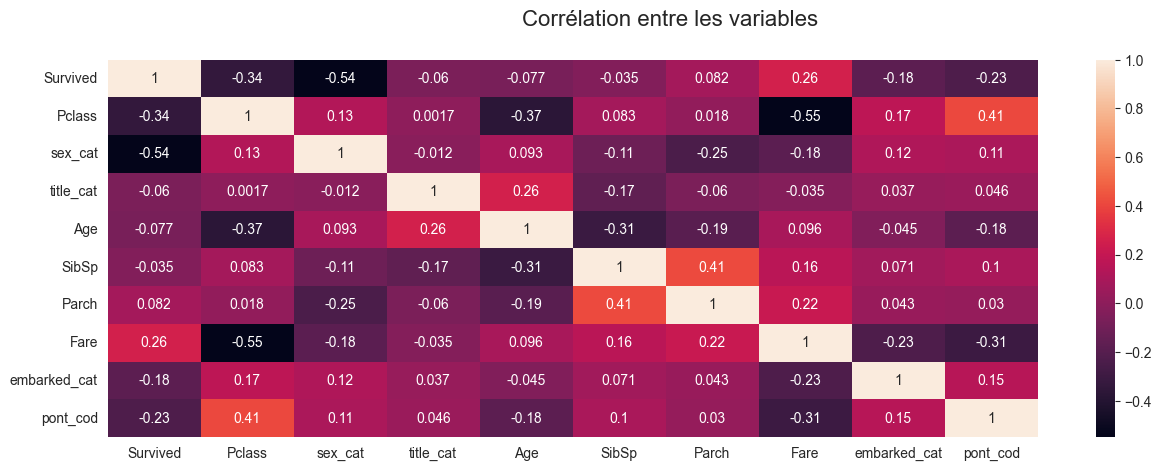

In [ ]:
##on utilise data.corr et le heatmap de seborn
corr_df = df.corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod'],
      dtype='object')

In [ ]:
df['group'] = df['SibSp'] + df['Parch']

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group'],
      dtype='object')

In [ ]:
df_temps_cor = df.copy()

CORR ------------------


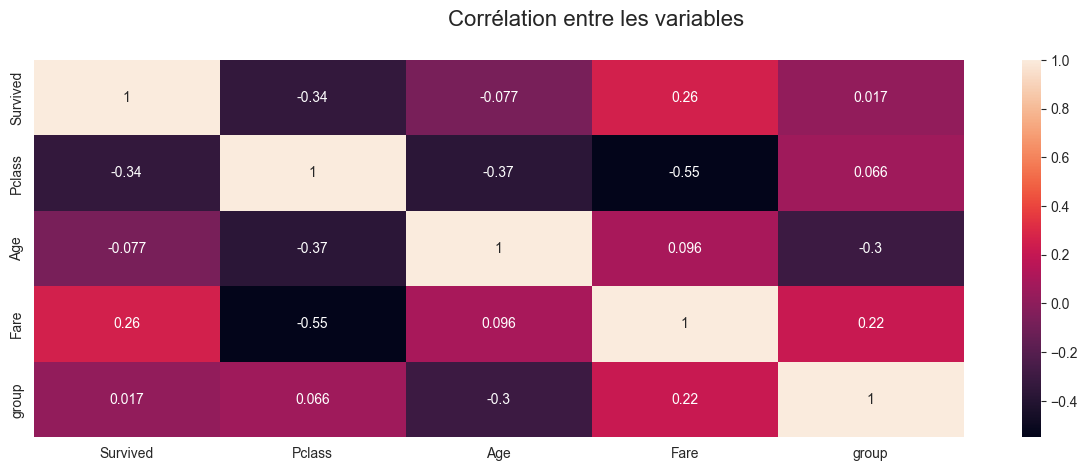

In [ ]:
##on utilise data.corr et le heatmap de seborn
corr_df = df_temps_cor[["Survived","Pclass","Age","Fare", "group"]].corr()
print("CORR ------------------")
#print(corr_df, "\n")
figure, ax = color_graph_background(1,1)
figure.set_size_inches(15, 5, forward=True)
figure.set_dpi(100)
figure.suptitle("Corrélation entre les variables", fontsize=16)
sns.heatmap(corr_df, annot=True)
plt.show()

## 3.2. Traiter l'âge

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group'],
      dtype='object')

### 3.2.1. AGE > Version manuelle

In [ ]:
age_cols = ['Survived', 'sex_cat', 'Pclass', 'title_cat', 'pont_cod', 'Fare', 'embarked_cat', 'SibSp', 'Parch']
df_age_full = df.copy()
df_age_full["age_manuel"] = df_age_full["Age"]
while (df_age_full['age_manuel'].isna().sum() > 0) & (len(age_cols)>0):
       df_age_full = calculer_moyenne_on_colums(df_age_full,age_cols, 'age_manuel')
       age_cols.pop()

df_age_full

age_manuel NA before: 177 age_manuel NA after: 89
age_manuel NA before: 89 age_manuel NA after: 85
age_manuel NA before: 85 age_manuel NA after: 82
age_manuel NA before: 82 age_manuel NA after: 80
age_manuel NA before: 80 age_manuel NA after: 7
age_manuel NA before: 7 age_manuel NA after: 0


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,Fare,Cabin,Embarked,embarked_cat,Last_name,First_name,deck3,pont_cod,group,age_manuel
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,7.2500,NaN,S,2,Braund,Owen Harris,G,6,1,22.0
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,7.2500,NaN,S,2,Coxon,Daniel,G,6,0,59.0
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,7.2500,NaN,S,2,Perkin,John Henry,G,6,0,22.0
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,7.2500,NaN,S,2,Lovell,"John Hall (""Henry"")",G,6,0,20.5
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,7.2500,NaN,S,2,Reed,James George,G,6,0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,"Dodge, Master. Washington",male,1,Master,5,4.0,0,2,81.8583,A34,S,2,Dodge,Washington,A,0,2,4.0
887,1,1,"Frauenthal, Dr. Henry William",male,1,Dr,2,50.0,2,0,133.6500,NaN,S,2,Frauenthal,Henry William,B,1,2,50.0
888,1,1,"Stahelin-Maeglin, Dr. Max",male,1,Dr,2,32.0,0,0,30.5000,B50,C,0,Stahelin-Maeglin,Max,B,1,0,32.0
889,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,1,Col,1,56.0,0,0,35.5000,A26,C,0,Simonius-Blumer,Oberst Alfons,A,0,0,56.0


In [ ]:
age_cols = ['Survived', 'sex_cat', 'Pclass', 'title_cat', 'pont_cod', 'Fare', 'embarked_cat', 'SibSp', 'Parch']
df_age_full["age_manuel_ctr"] = np.nan
while (df_age_full['age_manuel_ctr'].isna().sum() > 0) & (len(age_cols)>0):
       df_age_full = calculer_moyenne_on_colums(df_age_full,age_cols, 'age_manuel_ctr', 'Age')
       age_cols.pop()

df_age_full

age_manuel_ctr NA before: 891 age_manuel_ctr NA after: 89
age_manuel_ctr NA before: 89 age_manuel_ctr NA after: 85
age_manuel_ctr NA before: 85 age_manuel_ctr NA after: 82
age_manuel_ctr NA before: 82 age_manuel_ctr NA after: 80
age_manuel_ctr NA before: 80 age_manuel_ctr NA after: 7
age_manuel_ctr NA before: 7 age_manuel_ctr NA after: 0


,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,Cabin,Embarked,embarked_cat,Last_name,First_name,deck3,pont_cod,group,age_manuel,age_manuel_ctr
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,NaN,S,2,Braund,Owen Harris,G,6,1,22.0,22.0
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,NaN,S,2,Coxon,Daniel,G,6,0,59.0,31.0
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,NaN,S,2,Perkin,John Henry,G,6,0,22.0,31.0
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,NaN,S,2,Lovell,"John Hall (""Henry"")",G,6,0,20.5,31.0
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,NaN,S,2,Reed,James George,G,6,0,31.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,"Dodge, Master. Washington",male,1,Master,5,4.0,0,2,...,A34,S,2,Dodge,Washington,A,0,2,4.0,4.0
887,1,1,"Frauenthal, Dr. Henry William",male,1,Dr,2,50.0,2,0,...,NaN,S,2,Frauenthal,Henry William,B,1,2,50.0,50.0
888,1,1,"Stahelin-Maeglin, Dr. Max",male,1,Dr,2,32.0,0,0,...,B50,C,0,Stahelin-Maeglin,Max,B,1,0,32.0,32.0
889,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,1,Col,1,56.0,0,0,...,A26,C,0,Simonius-Blumer,Oberst Alfons,A,0,0,56.0,56.0


### 3.2.1. AGE > Version régression linéaire

<mark>Faire une régression linéaire pour estimer l'âge pour les données manquantes</mark>    
par rapport à la classe, au billet, ....

In [ ]:
x_col = ['Survived', 'sex_cat', 'Pclass', 'pont_cod', 'Fare', 'embarked_cat', 'SibSp', 'Parch']
y_col = ["Age"]
all_col= x_col
all_col.extend(y_col)

df_age = df_age_full[all_col]
df_age_x = df_age[df_age["Age"].isna() == False]

df_age_to_predict = df_age[df_age["Age"].isna()]
df_age_to_predict = df_age_to_predict[x_col]

df_age_y = df_age_x[y_col]
df_age_x = df_age_x[x_col]

<AxesSubplot:>

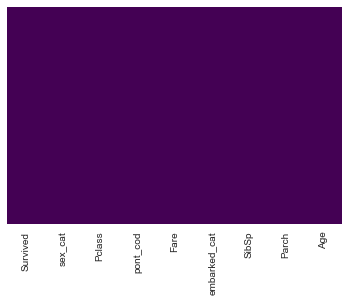

In [ ]:
sns.heatmap(df_age_x.isnull(), yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

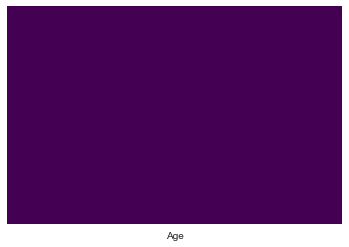

In [ ]:
sns.heatmap(df_age_y.isnull(), yticklabels=False,cbar=False,cmap='viridis')

### Estimation de l'âge

In [ ]:
age_xtrain, age_xtest, age_ytrain, age_ytest = train_test_split(df_age_x, df_age_y, train_size=0.8)
age_xtrain

,Survived,sex_cat,Pclass,pont_cod,Fare,embarked_cat,SibSp,Parch,Age
227,0,1,3,1,8.0500,2,0,0,24.5
64,0,1,3,6,7.7958,2,0,0,22.0
568,0,1,1,1,79.2000,0,0,0,46.0
413,1,1,1,4,26.5500,2,0,0,48.0
356,1,0,3,4,7.8792,1,0,0,19.0
...,...,...,...,...,...,...,...,...,...
415,1,1,1,4,26.5500,0,0,0,35.0
825,0,1,2,4,10.5000,2,0,0,32.0
50,0,1,3,6,7.8958,2,0,0,30.0
45,0,1,3,6,7.8958,2,0,0,32.0


In [ ]:
mini = max(df_age_full["Age"])
mini

80.0

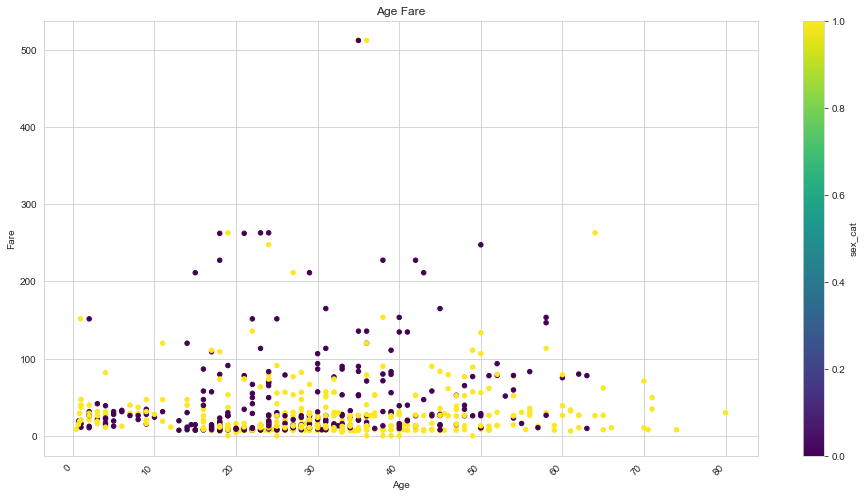

In [ ]:
draw_regression2(df_age_full, 'Age', 'Fare', 'sex_cat')

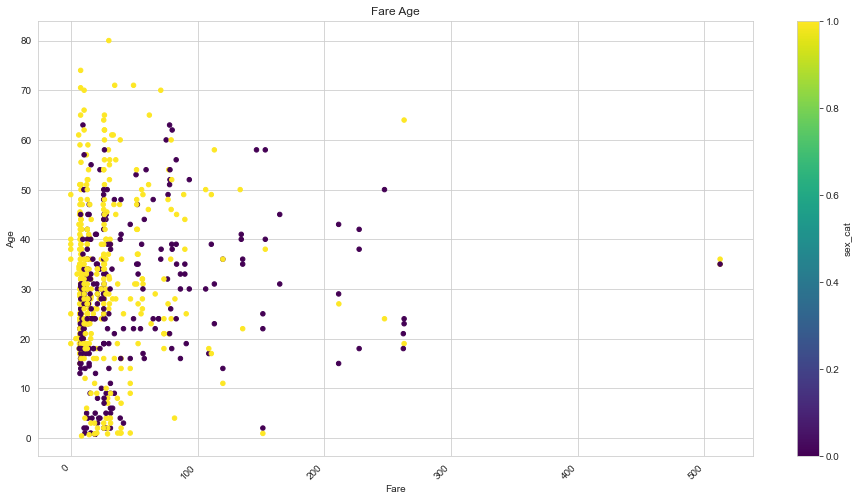

In [ ]:
draw_regression2(df_age_full, 'Fare', 'Age', 'sex_cat')

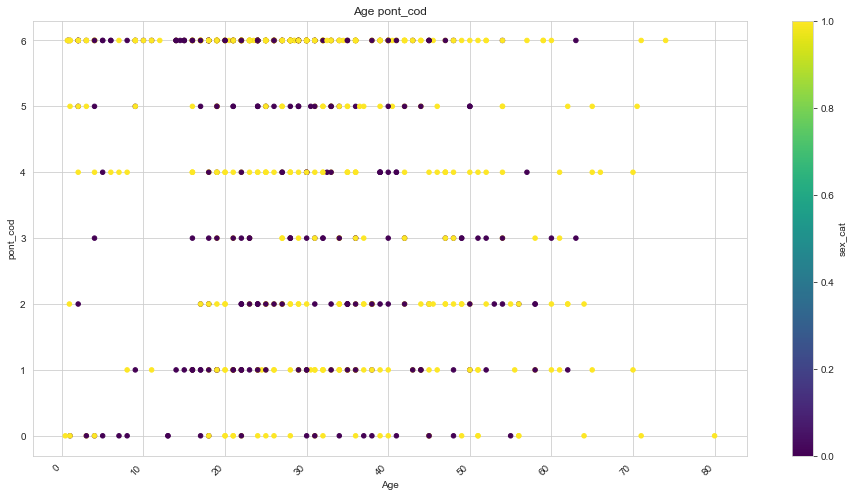

In [ ]:
draw_regression2(df_age_full, 'Age', 'pont_cod', 'sex_cat')

In [ ]:
df_temp =df_age_x[['Age', 'Fare']]
print(df_temp.shape, df_age_y.shape)


(714, 2) (714, 1)


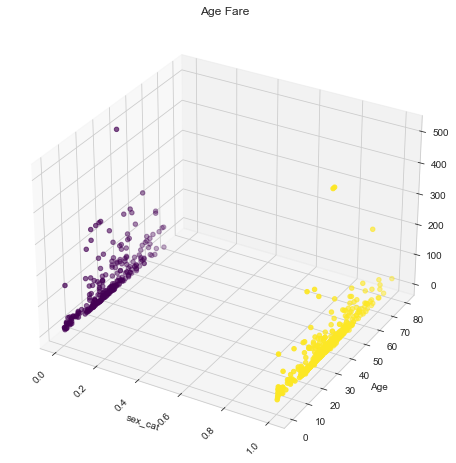

In [ ]:
draw_regression_3d(df_age_full, 'Age', "Fare", "sex_cat")

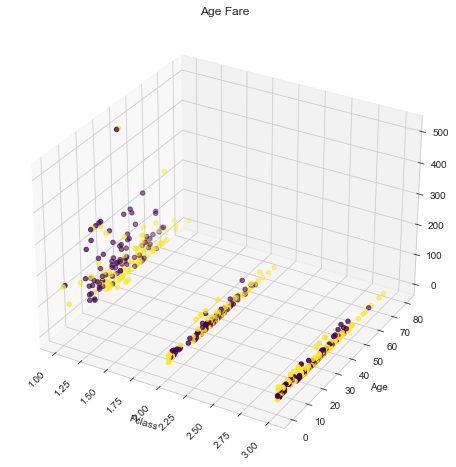

In [ ]:
draw_regression_3d(df_age_full,  'Age',"Fare", "Pclass", "sex_cat")

<mark>Faire une régression linéaire pour estimer l'âge pour les données manquantes</mark>    
par rapport à la classe, au billet, ....

Compléter les cabines pour les valeurs manquantes


De nombreuses valeurs manquantes parsèment le jeu de données.
Le nombre sur **Cabin** peut potentiellement facilement s'expliquer assez facilement : cela correspond pour une grande partie à des individus qui n'avaient simplement pas de cabine. En effet seuls les passagers de 1ère classe et certains de 2ème disposaient d'un numéro de cabine pour leur voyage.

Ces cabines étaient répartis entre les ponts A et E pour les 1ère classe, et de D à G pour les autres.
La cabine T est une cabine de classe supérieure située sur le pont A.

Si on observe rapidement la variable Cabin, on peut noter que le première caractère correspond au pont en question. On extrait donc ce dernier et on analyse la répartition des classes au sein des valeurs manquantes sur notre pont.

In [ ]:
df_age_full["age_formula"] = df_age_full['Age']

In [ ]:
df_age_full.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group', 'age_manuel',
       'age_manuel_ctr', 'age_formula'],
      dtype='object')

In [ ]:
mask = df_age_full["age_formula"].notnull()

lr = smf.ols(formula='Age ~ Survived + Pclass + sex_cat + Titre + title_cat + SibSp + Parch + Fare + Embarked + embarked_cat + deck3 + pont_cod',
             data=df_age_full.loc[mask,:]).fit()

df_age_full.loc[~mask, 'age_formula'] = round(lr.predict(df_age_full.loc[~mask,:].drop(columns=['age_formula'])),0)
df_age_full.isnull().sum()

Survived            0
Pclass              0
Name                0
Sex                 0
sex_cat             0
Titre               0
title_cat           0
Age               177
SibSp               0
Parch               0
Fare                0
Cabin             687
Embarked            2
embarked_cat        0
Last_name           0
First_name          0
deck3               0
pont_cod            0
group               0
age_manuel          0
age_manuel_ctr      0
age_formula         0
dtype: int64

Comparaison des 2 colonnes

In [ ]:
df_age_full.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group', 'age_manuel',
       'age_manuel_ctr', 'age_formula'],
      dtype='object')

In [ ]:
df_age_temp = df_age_full[['Survived', 'Pclass', 'sex_cat', 'Titre', 'Age', 'Fare', 'Embarked', 
       'deck3', 'age_manuel', 'age_manuel_ctr', 'age_formula']]

In [ ]:
df_age_temp[(df_age_temp['age_manuel_ctr'] != df_age_temp['Age']) & (df_age_temp["Age"].notna())]

,Survived,Pclass,sex_cat,Titre,Age,Fare,Embarked,deck3,age_manuel,age_manuel_ctr,age_formula
1,0,3,1,Mr,59.00,7.25,S,G,59.00,31.0,59.00
2,0,3,1,Mr,22.00,7.25,S,G,22.00,31.0,22.00
3,0,3,1,Mr,20.50,7.25,S,G,20.50,31.0,20.50
5,0,3,1,Mr,22.00,7.25,S,G,22.00,31.0,22.00
6,0,3,1,Mr,30.00,7.25,S,G,30.00,31.0,30.00
...,...,...,...,...,...,...,...,...,...,...,...
867,1,2,1,Master,3.00,18.75,S,G,3.00,2.0,3.00
868,1,2,1,Master,0.83,18.75,S,G,0.83,2.0,0.83
871,0,2,0,Miss,24.00,13.00,S,G,24.00,31.0,24.00
872,0,2,0,Miss,38.00,13.00,S,G,38.00,31.0,38.00


In [ ]:
df_age_temp["ecart_manuel"] = df_age_temp['Age'] - df_age_temp['age_manuel_ctr']
df_age_temp["ecart_manuel"].value_counts().head(20)

C:\Users\User\AppData\Local\Temp/ipykernel_22228/425357578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_temp["ecart_manuel"] = df_age_temp['Age'] - df_age_temp['age_manuel_ctr']


 0.0     388
-1.0      23
 3.0      19
 1.0      19
 2.0      18
-4.0      18
-2.0      16
-8.0      16
-3.0      16
-5.0      14
-6.0      13
-7.0      11
 6.0      11
-10.0      8
 4.0       8
 5.0       7
 0.5       6
 12.0      6
-12.0      5
 13.0      5
Name: ecart_manuel, dtype: int64

Impossible de faire le même contrôle avec la formule

In [ ]:
df_age_temp[(df_age_temp['age_formula'] != df_age_temp['Age']) & (df_age_temp["Age"].notna())]

,Survived,Pclass,sex_cat,Titre,Age,Fare,Embarked,deck3,age_manuel,age_manuel_ctr,age_formula,ecart_manuel


In [ ]:
df_age_temp[(df_age_temp['age_manuel'] == df_age_temp['age_formula']) & (df_age_temp["Age"].isna())]

,Survived,Pclass,sex_cat,Titre,Age,Fare,Embarked,deck3,age_manuel,age_manuel_ctr,age_formula,ecart_manuel
154,0,3,1,Mr,NaN,16.1000,S,G,27.0,27.0,27.0,NaN
194,0,3,1,Mr,NaN,8.7125,C,A,29.0,29.0,29.0,NaN
312,1,1,0,Mrs,NaN,146.5208,C,B,39.0,39.0,39.0,NaN
382,1,3,1,Mr,NaN,7.7750,S,G,25.0,25.0,25.0,NaN
515,0,3,0,Miss,NaN,7.7500,Q,F,26.0,26.0,26.0,NaN
577,0,1,1,Mr,NaN,27.7208,C,G,40.0,40.0,40.0,NaN
578,0,1,1,Mr,NaN,27.7208,C,G,40.0,40.0,40.0,NaN
628,1,3,0,Mrs,NaN,22.3583,C,F,29.0,29.0,29.0,NaN
877,0,1,1,Dr,NaN,39.6000,C,G,44.0,44.0,44.0,NaN


In [ ]:
df_age_temp[(df_age_temp['age_manuel'] != df_age_temp['age_formula']) & (df_age_temp["Age"].isna())]

,Survived,Pclass,sex_cat,Titre,Age,Fare,Embarked,deck3,age_manuel,age_manuel_ctr,age_formula,ecart_manuel
4,0,3,1,Mr,NaN,7.2500,S,G,31.0,31.0,29.0,NaN
7,0,3,1,Mr,NaN,7.2500,S,G,31.0,31.0,29.0,NaN
8,0,3,1,Mr,NaN,7.2500,S,G,31.0,31.0,29.0,NaN
16,0,3,1,Mr,NaN,7.3125,S,G,28.0,28.0,29.0,NaN
31,0,3,1,Mr,NaN,7.8958,S,G,27.0,27.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
815,0,2,1,Mr,NaN,0.0000,S,G,32.0,32.0,36.0,NaN
816,0,2,1,Mr,NaN,0.0000,S,G,32.0,32.0,36.0,NaN
817,0,2,1,Mr,NaN,0.0000,S,G,32.0,32.0,36.0,NaN
818,0,2,1,Mr,NaN,0.0000,S,G,32.0,32.0,36.0,NaN


* 9 âges identiques avec les deux formules
* 168 différences de calcul d'age avec les deux formules

In [ ]:
df_age_temp["diff_formula_manuel"] = df_age_temp['age_formula'] - df_age_temp['age_manuel']
df_age_temp["diff_formula_manuel"].value_counts()

C:\Users\User\AppData\Local\Temp/ipykernel_22228/727164344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_temp["diff_formula_manuel"] = df_age_temp['age_formula'] - df_age_temp['age_manuel']


 0.0     723
 2.0      27
-2.0      18
 3.0      14
 4.0      13
 1.0      11
-1.0       9
-12.0      9
-5.0       8
 6.0       7
-7.0       6
 5.0       6
-4.0       5
-13.0      4
-8.0       4
-6.0       4
-17.0      4
-14.0      3
 10.0      3
 13.0      2
-15.0      1
-21.0      1
 8.0       1
-18.0      1
-11.0      1
 7.0       1
 11.0      1
 21.0      1
 12.0      1
 9.0       1
 16.0      1
Name: diff_formula_manuel, dtype: int64

## 3.3. Suppression des colonnes inutiles

In [ ]:
df_age_full.head()

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,Age,SibSp,Parch,...,Embarked,embarked_cat,Last_name,First_name,deck3,pont_cod,group,age_manuel,age_manuel_ctr,age_formula
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,22.0,1,0,...,S,2,Braund,Owen Harris,G,6,1,22.0,22.0,22.0
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,59.0,0,0,...,S,2,Coxon,Daniel,G,6,0,59.0,31.0,59.0
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,22.0,0,0,...,S,2,Perkin,John Henry,G,6,0,22.0,31.0,22.0
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,20.5,0,0,...,S,2,Lovell,"John Hall (""Henry"")",G,6,0,20.5,31.0,20.5
4,0,3,"Reed, Mr. James George",male,1,Mr,7,NaN,0,0,...,S,2,Reed,James George,G,6,0,31.0,31.0,29.0


In [ ]:
df_age_full.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group', 'age_manuel',
       'age_manuel_ctr', 'age_formula'],
      dtype='object')

In [ ]:
df_clean = df_age_full[['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'deck3', 'pont_cod', 'group', 'age_formula']]

In [ ]:
df_clean = df_clean.rename(columns={'deck3':'Deck', 'age_formula':"Age", 'pont_cod':'deck_cat'})
df_clean.head()

,Survived,Pclass,Name,Sex,sex_cat,Titre,title_cat,SibSp,Parch,Fare,Cabin,Embarked,embarked_cat,Last_name,First_name,Deck,deck_cat,group,Age
0,0,3,"Braund, Mr. Owen Harris",male,1,Mr,7,1,0,7.25,NaN,S,2,Braund,Owen Harris,G,6,1,22.0
1,0,3,"Coxon, Mr. Daniel",male,1,Mr,7,0,0,7.25,NaN,S,2,Coxon,Daniel,G,6,0,59.0
2,0,3,"Perkin, Mr. John Henry",male,1,Mr,7,0,0,7.25,NaN,S,2,Perkin,John Henry,G,6,0,22.0
3,0,3,"Lovell, Mr. John Hall (""Henry"")",male,1,Mr,7,0,0,7.25,NaN,S,2,Lovell,"John Hall (""Henry"")",G,6,0,20.5
4,0,3,"Reed, Mr. James George",male,1,Mr,7,0,0,7.25,NaN,S,2,Reed,James George,G,6,0,29.0


Vérifiez la taille de votre data, supprimer les valeurs manquantes

In [ ]:
df_clean.isna().sum()

Survived          0
Pclass            0
Name              0
Sex               0
sex_cat           0
Titre             0
title_cat         0
SibSp             0
Parch             0
Fare              0
Cabin           687
Embarked          2
embarked_cat      0
Last_name         0
First_name        0
Deck              0
deck_cat          0
group             0
Age               0
dtype: int64

Sauvegarder le fichier traité

In [ ]:
df_clean.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'sex_cat', 'Titre', 'title_cat',
       'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'embarked_cat',
       'Last_name', 'First_name', 'Deck', 'deck_cat', 'group', 'Age'],
      dtype='object')

In [ ]:
now = datetime.now() # current date and time
date_time = now.strftime("%Y-%m-%d-%H_%M_%S")
file_dest_name = file_name.replace(".csv", '_process_' + date_time + '.csv')
# Création d'un fichier CVS plus léger pour faciliter la phase de d'analyse des données
df_to_write = df_clean[['Survived', 'Sex', 'Pclass', 'Name', 'Age', 'Titre', 'Last_name', 'First_name', 'SibSp', 'Parch', 'Fare', 'group', 'Deck', 'Cabin', 'Embarked']].reset_index()
df_to_write = df_to_write.rename(columns={"index":"PassengerId"})
df_to_write.to_csv(file_path+file_dest_name, sep=file_separator, index=False)
print("File save on:", file_path+file_dest_name)

File save on: c:\Users\User\WORK\wokspace-simplon3\simplon\projets\titanic\titanic_dataset_kaggle_train_process_2022-01-15-15_30_11.csv
